### Flu Shot Learning: Predict H1N1 and Seasonal Flu Vaccines

#### Question or problem definition

1. Can you predict whether people got H1N1 and seasonal flu vaccines using information they shared about their backgrounds, opinions, and health behaviors?

2. Problem description:
Your goal is to predict how likely individuals are to receive their H1N1 and seasonal flu vaccines. Specifically, you'll be predicting two probabilities: one for h1n1_vaccine and one for seasonal_vaccine.

3. It looks like a classification problem in supervised machine learning

**Additionally, I have read through the short history of the H1N1 influenza virus (Swine flu) on the competition's site**

In [1]:
# Modules for this project
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning algorithms for classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

**Load the datasets and preview the dataset features**


*# I need to have an idea of how the dataset looks like before reading it*

**For this competition, there are two target variables:**

*1. h1n1_vaccine - Whether respondent received H1N1 flu vaccine.*

*2. seasonal_vaccine - Whether respondent received seasonal flu vaccine.*

In [2]:
train = pd.read_csv(f'training_set_features.csv', low_memory=False,
                       index_col=["respondent_id"])

In [3]:
test = pd.read_csv('test_set_features.csv', index_col='respondent_id')

In [4]:
train_labels = pd.read_csv('training_set_labels.csv', index_col='respondent_id')

In [5]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [6]:
train.shape, test.shape, train_labels.shape

((26707, 35), (26708, 35), (26707, 2))

**# Preview of the training, test features & labels**

In [7]:
display_all(train.head(2))

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe


In [8]:
display_all(test.head(2))

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,35 - 44 Years,College Graduate,Hispanic,Female,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,4.0,1.0,1.0,18 - 34 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp


In [9]:
display_all(train_labels.head(2))

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1


**The training set has 26,707 observations and 35 features, taking away the index column**

**The test set has 26,708 observations and 35 features, taking away the index column**

**Features columns in the training dataset**

In [10]:
print(train.columns)

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')


**Which features are categorical and or numerical?**

*A categorical variable is a variable that can take on one of a limited, and usually fixed, number of possible values, assigning each individual or other unit of observation to a particular group or nominal category on the basis of some qualitative property.*

*A numerical variable is a variable where the measurement or number has a numerical meaning*

In [11]:
train.dtypes

h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty           

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

**Numerical variables**

*Because the value of column is numerical does not mean it's a numerical variable*


**Categorical variables**

*The training set has lots of categorical variables*

*Confirming if the number of rows & columns in the train set match the labels.*

*Using the Numpy's assert_array_equal function**

*An error means they don't match*

In [13]:
np.testing.assert_array_equal(train.index.values, train_labels.index.values)

**Exploring the data**

In [14]:
train.describe()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,...,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,...,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,...,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,...,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,...,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


**Checking for missing values**

In [15]:
missing_col = train.columns[train.isnull().any()]
# Number of columns with missing values
print('Number of columns with missing values:',len(missing_col))

Number of columns with missing values: 30


In [16]:
missing_col = train.isnull().sum
missing_col()

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

**This exploration is inspired by the walk-through by Jayqi on the driven data site.**

*We start off by exploring the flu shot labels*

*The distribution of the labels (two target variables)*

**Observations**

*1. About 80% of respondents did not receive the H1N1 vaccine* 

*2. The difference in respondents who received and did not receive the Seasonal vaccine is not so significant*

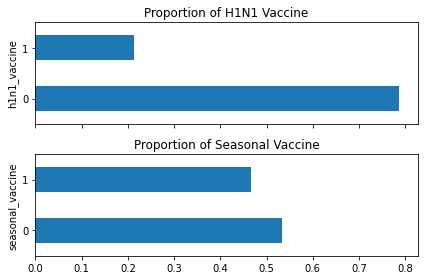

In [17]:
fig, ax = plt.subplots(2, 1, sharex=True) # creating a figure a set of subplots
# sharex=True means the x and y axis will be shared among subplots

n_obs = train_labels.shape[0] # The number of rows of in the label data set

(train_labels['h1n1_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of H1N1 Vaccine", ax=ax[0])
)
ax[0].set_ylabel("h1n1_vaccine")

(train_labels['seasonal_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of Seasonal Vaccine", ax=ax[1])
)
ax[1].set_ylabel("seasonal_vaccine")

fig.tight_layout()

*Are the two target variables independent?*

In [18]:
# pd.crosstab function computes a simple cross tabulation of two (or more) factors
pd.crosstab(
    train_labels["h1n1_vaccine"], 
    train_labels["seasonal_vaccine"], 
    margins=True,
    normalize=True
)

seasonal_vaccine,0,1,All
h1n1_vaccine,,,
0,0.497810,0.289737,0.787546
1,0.036582,0.175871,0.212454
All,0.534392,0.465608,1.000000


*Most people who got an H1N1 flu vaccine also got the seasonal flu vaccine.* 

*While a minority of people who got the seasonal vaccine got the H1N1 vaccine, they got the H1N1 vaccine at a higher rate than those who did not get the seasonal vaccine*

In [19]:
# Phi Coefficient is the same as Pearson for two binary variables
(train_labels["h1n1_vaccine"]
     .corr(train_labels["seasonal_vaccine"], method="pearson")
)

0.3771426530614468

**The Phi Coefficient is a measure of association between two binary variables**

**At least one variable is a nominal variable or both variables are dichotomous variables.**

*The phi coefficient is a symmetrical statistic, which means the independent variable and dependent variables are interchangeable.The interpretation for the phi coefficient is similar to the Pearson Correlation Coefficient. The range is from -1 to 1, where:*

*0 is no relationship.*

*1 is a perfect positive relationship: most of your data falls along the diagonal cells.*

*-1 is a perfect negative relationship: most of your data is not on the diagonal.*

**Interpretation of 0.377?**

**Pearson Correlation Coefficients:**
	
+.70 or higher	Very strong positive relationship

+.40 to +.69	Strong positive relationship

+.30 to +.39	Moderate positive relationship

+.20 to +.29	weak positive relationship

+.01 to +.19	No or negligible relationship

0	No relationship

-.01 to -.19	No or negligible relationship

-.20 to -.29	weak negative relationship

-.30 to -.39	Moderate negative relationship

-.40 to -.69	Strong negative relationship

-.70 or higher	Very strong negative relationship

**So there is a moderate positive relationship between the two target variables** 

### Features

*combine our features and labels into one DataFrame.*

In [20]:
join_train = train.join(train_labels)
print(join_train.shape)
join_train.head(2)

(26707, 37)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1


**Prototyping a Plot**

*Let's see how the features are correlated with the target variables. We'll start with trying to visualize if there is simple bivariate correlation. If a feature is correlated with the target, we'd expect there to be different patterns of vaccination as you vary the values of the feature.*

*Start with one feature and the h1n1_vaccine as the first target variable*

In [21]:
# Count the observations for each combination of the two variables
counts = (join_train[['h1n1_concern', 'h1n1_vaccine']]
              .groupby(['h1n1_concern', 'h1n1_vaccine'])
              .size()
              .unstack('h1n1_vaccine')
         )
counts

h1n1_vaccine,0,1
h1n1_concern,,
0.0,2849,447
1.0,6756,1397
2.0,8102,2473
3.0,3250,1341


*Plot a bar chart.*

*Compare how the group sizes change as h1n1_concern varies*

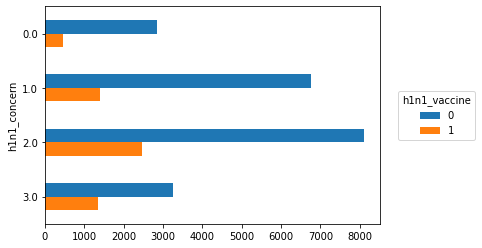

In [22]:
ax = counts.plot.barh()
ax.invert_yaxis()
ax.legend(
    loc='center right', 
    bbox_to_anchor=(1.3, 0.5), 
    title='h1n1_vaccine'
);

**Observations**

*1. h1n1_concern represents the level of concern about the H1N1 flu. We see for every level of concern, the likelihood of receiving the h1n1 vaccine is low*

*2. Respondents with the frequency of 2 = Somewhat concerned, did not receive the vaccine but also ranked highest in receiving the vaccine*

*3. Respondents with low concern frequency showed low receipt of the vaccine **


In [23]:
# The rate of vaccination for each level of h1n1_concern
# Sum of all individul concern level of h1n1(0 & 1)
h1n1_concern_counts = counts.sum(axis='columns')
h1n1_concern_counts

h1n1_concern
0.0     3296
1.0     8153
2.0    10575
3.0     4591
dtype: int64

In [24]:
# Divided the sum of counts by 0 & 1 of the h1n1
props = counts.div(h1n1_concern_counts, axis='index')
props

h1n1_vaccine,0,1
h1n1_concern,,
0.0,0.864381,0.135619
1.0,0.828652,0.171348
2.0,0.766147,0.233853
3.0,0.707907,0.292093


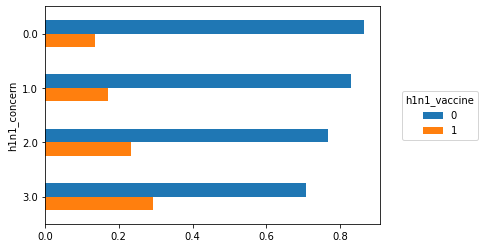

In [25]:
# Plot a bar histogram of this division
ax = props.plot.barh()
ax.invert_yaxis()
ax.legend(
    loc='center left', 
    bbox_to_anchor=(1.05, 0.5),
    title='h1n1_vaccine'
);

**The plot shows the higher the level of concern, the higher the chances of receiving the vaccine**

*Since every pair of bars adds up to 1.0 and we have two bars, it's a good use case for a stacked bar chart*

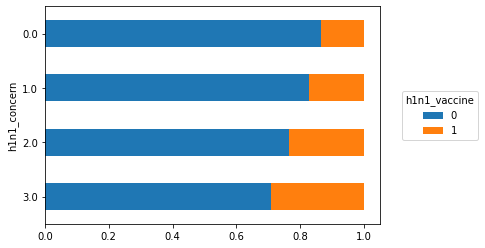

In [26]:
ax = props.plot.barh(stacked=True)
ax.invert_yaxis()
ax.legend(
    loc='center left', 
    bbox_to_anchor=(1.05, 0.5),
    title='h1n1_vaccine'
);

**Plotting more variables**

*Factoring the code above into a function so we can use it on more variables*

In [27]:
def vaccination_rate_plot(col, target, data, ax=None):
    """Stacked bar chart of vaccination rate for `target` against 
    `col`. 
    
    Args:
        col (string): column name of feature variable
        target (string): column name of target variable
        data (pandas DataFrame): dataframe that contains columns 
            `col` and `target`
        ax (matplotlib axes object, optional): matplotlib axes 
            object to attach plot to
    """
    counts = (join_train[[target, col]]
                  .groupby([target, col])
                  .size()
                  .unstack(target)
             )
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')

    props.plot(kind="barh", stacked=True, ax=ax)
    ax.invert_yaxis()
    ax.legend().remove()

In [28]:
join_train.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

*loop through several columns and plot against the h1n1_vaccine and seasonal_vaccine.*

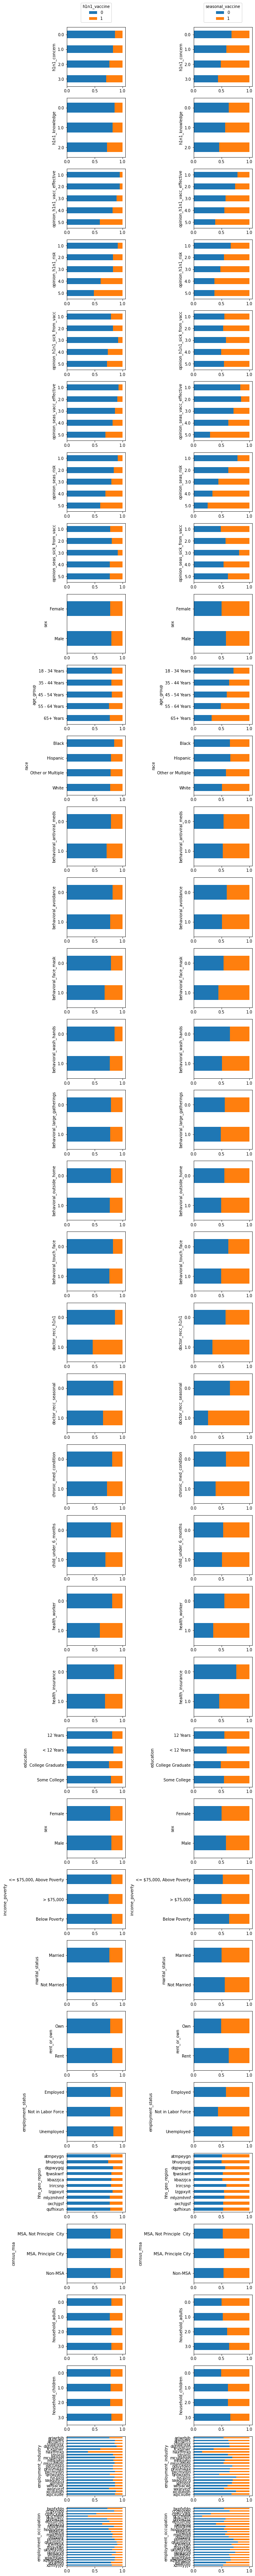

In [29]:
cols_to_plot = [
    'h1n1_concern',
    'h1n1_knowledge',
    'opinion_h1n1_vacc_effective',
    'opinion_h1n1_risk',
    'opinion_h1n1_sick_from_vacc',
    'opinion_seas_vacc_effective',
    'opinion_seas_risk',
    'opinion_seas_sick_from_vacc',
    'sex',
    'age_group',
    'race',
    'behavioral_antiviral_meds',
    'behavioral_avoidance',
    'behavioral_face_mask',
    'behavioral_wash_hands',
    'behavioral_large_gatherings',
    'behavioral_outside_home',
    'behavioral_touch_face',
    'doctor_recc_h1n1',
    'doctor_recc_seasonal',
    'chronic_med_condition',
    'child_under_6_months',
    'health_worker',
    'health_insurance',
    'education',
    'sex',
    'income_poverty',
    'marital_status',
    'rent_or_own', 
    'employment_status', 
    'hhs_geo_region', 
    'census_msa',
    'household_adults', 
    'household_children', 
    'employment_industry',
    'employment_occupation'
]

fig, ax = plt.subplots(
    len(cols_to_plot), 2, figsize=(9, len(cols_to_plot)*2.5)
)
for idx, col in enumerate(cols_to_plot):
    vaccination_rate_plot(
        col, 'h1n1_vaccine', join_train, ax=ax[idx, 0]
    )
    vaccination_rate_plot(
        col, 'seasonal_vaccine', join_train, ax=ax[idx, 1]
    )

ax[0, 0].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='h1n1_vaccine'
)
ax[0, 1].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='seasonal_vaccine'
)
fig.tight_layout()

**BUILDING SOME MODELS**

*logistic regression is a simple and fast linear model for classification problems. Logistic regression is a great model choice for a first-pass baseline model when starting out on a problem* 

In [30]:
from sklearn.preprocessing import StandardScaler # 

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, roc_auc_score

RANDOM_SEED = 6    # Set a random seed for reproducibility!

**Logistic Regression Implementation**

*Standard logistic regression only works with numeric input for features*

*The benchmark model was built using numeric columns*

*After the benchmark walk-through, I'll work on the categorical variables*

In [31]:
train.dtypes != 'object'

h1n1_concern                    True
h1n1_knowledge                  True
behavioral_antiviral_meds       True
behavioral_avoidance            True
behavioral_face_mask            True
behavioral_wash_hands           True
behavioral_large_gatherings     True
behavioral_outside_home         True
behavioral_touch_face           True
doctor_recc_h1n1                True
doctor_recc_seasonal            True
chronic_med_condition           True
child_under_6_months            True
health_worker                   True
health_insurance                True
opinion_h1n1_vacc_effective     True
opinion_h1n1_risk               True
opinion_h1n1_sick_from_vacc     True
opinion_seas_vacc_effective     True
opinion_seas_risk               True
opinion_seas_sick_from_vacc     True
age_group                      False
education                      False
race                           False
sex                            False
income_poverty                 False
marital_status                 False
r

In [32]:
train[['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa']].head(1)

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa
respondent_id,,,,,,,,,,
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA


In [33]:
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
train['age_group_cat'] = labelencoder.fit_transform(train['age_group'])
train[['age_group', 'age_group_cat']].head(2)

,age_group,age_group_cat
respondent_id,,
0,55 - 64 Years,3
1,35 - 44 Years,1


In [34]:
train.head(2)

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,age_group_cat
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,3
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,1


In [35]:
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
test['age_group_cat'] = labelencoder.fit_transform(test['age_group'])
test[['age_group', 'age_group_cat']].head(2)

,age_group,age_group_cat
respondent_id,,
26707,35 - 44 Years,1
26708,18 - 34 Years,0


In [36]:
numeric_cols = train.columns[train.dtypes != "object"].values
print(numeric_cols)

['h1n1_concern' 'h1n1_knowledge' 'behavioral_antiviral_meds'
 'behavioral_avoidance' 'behavioral_face_mask' 'behavioral_wash_hands'
 'behavioral_large_gatherings' 'behavioral_outside_home'
 'behavioral_touch_face' 'doctor_recc_h1n1' 'doctor_recc_seasonal'
 'chronic_med_condition' 'child_under_6_months' 'health_worker'
 'health_insurance' 'opinion_h1n1_vacc_effective' 'opinion_h1n1_risk'
 'opinion_h1n1_sick_from_vacc' 'opinion_seas_vacc_effective'
 'opinion_seas_risk' 'opinion_seas_sick_from_vacc' 'household_adults'
 'household_children' 'age_group_cat']


**Feature Preprocessing**

*There are two important data preprocessing steps before jumping to the logistic regression:*
    
1. Scaling with StandardScaler: Transform all features to be on the same scale
2. NA Imputation: Logistic regression does not handle NA values. We will use median imputation, 
    which fills missing values with the median from the training data, implemented with SimpleImputer

*Using Scikit-Learn's built-in composition functionality to encapsulate everything into a pipeline.*

*Building pipelines is a best practice for building machine learning models.*

In [39]:
# Chain together the preprocessing steps (scaling and imputing)
# Use Scikit-Learn's ColumnTransformer
# each step is a tuple of (name you chose, sklearn transformer)
numeric_preprocessing_steps = Pipeline([
    ('standard_scaler', StandardScaler()),
    ('simple_imputer', SimpleImputer(strategy='median'))
])

# create the preprocessor stage of final pipeline
# each entry in the transformer list is a tuple of
# (name you choose, sklearn transformer, list of columns)
preprocessor = ColumnTransformer(
    transformers = [
        ("numeric", numeric_preprocessing_steps, numeric_cols)
    ],
    remainder = "drop"
)

*Define our estimators.*

*Use scikit-learn's default hyperparameters for LogisticRegression of L2 (a.k.a. Ridge) regularization with C value (inverse regularization strength) of 1*

*Because we have two labels to predict, use Scikit-Learn's MultiOutputClassifier*

In [50]:
# Estimator
estimators = MultiOutputClassifier(
    estimator=LogisticRegression(penalty="l2", C=1))

In [51]:
# Putting Together the Full Pipeline
full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimators),
])

In [52]:
full_pipeline

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numeric',
                                                  Pipeline(memory=None,
                                                           steps=[('standard_scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True)),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                 

**Training and Evaluation**

In [53]:
# Split our available data into a training and evaluation set
# Because the h1n1_vaccine label classes are moderately imbalanced
#this can lead to lopsided splits.
#But we can use the stratify argument to enforce even splits
X_train, X_eval, y_train, y_eval = train_test_split(
    train,
    train_labels,
    test_size=0.33,
    shuffle=True,
    stratify=train_labels,
    random_state=RANDOM_SEED
)

In [54]:
%%time

# Train model
full_pipeline.fit(X_train, y_train)

# Predict on evaluation set
# This competition wants probabilities, not labels
preds = full_pipeline.predict_proba(X_eval)
preds

CPU times: user 503 ms, sys: 52.1 ms, total: 555 ms
Wall time: 305 ms


[array([[0.74532267, 0.25467733],
        [0.89205082, 0.10794918],
        [0.81017512, 0.18982488],
        ...,
        [0.9276718 , 0.0723282 ],
        [0.92126113, 0.07873887],
        [0.92455737, 0.07544263]]),
 array([[0.65738406, 0.34261594],
        [0.54770011, 0.45229989],
        [0.22220239, 0.77779761],
        ...,
        [0.88154996, 0.11845004],
        [0.89502226, 0.10497774],
        [0.1277862 , 0.8722138 ]])]

In [55]:
print("test_probas[0].shape", preds[0].shape)
print("test_probas[1].shape", preds[1].shape)

test_probas[0].shape (8814, 2)
test_probas[1].shape (8814, 2)


In [56]:
# This has given us back a list of two (n_obs, 2) arrays. 
# The first array is for h1n1_vaccine, and the second array 
#is for seasonal_vaccine. 
# The two columns for each array are probabilities for class 0 
#and class 1 respectively. 
# That means we want the second column (index 1) for each of the two arrays. 
#Let's grab those and put them in a data frame.

In [57]:
y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": preds[0][:, 1],
        "seasonal_vaccine": preds[1][:, 1],
    },
    index = y_eval.index
)
print("y_preds.shape:", y_preds.shape)
y_preds.head()

y_preds.shape: (8814, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
6728,0.254677,0.342616
16516,0.107949,0.452300
3106,0.189825,0.777798
16981,0.692659,0.906131
19111,0.275409,0.769029


In [58]:
# This competition uses ROC AUC as the metric. 
# Let's plot ROC curves and take a look. 
# Unfortunately, scikit-learn's convenient 
#plot_roc_curve doesn't support multilabel, 
#so we'll need to make the plot ourselves.

In [59]:
y_eval

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
6728,1,0
16516,0,0
3106,0,1
16981,1,1
19111,0,1
...,...,...
6876,0,0
5834,1,1
13478,0,0


In [60]:
def plot_roc(y_true, y_score, label_name, ax):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
    ax.set_ylabel('TPR')
    ax.set_xlabel('FPR')
    ax.set_title(
        f"{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}"
    )

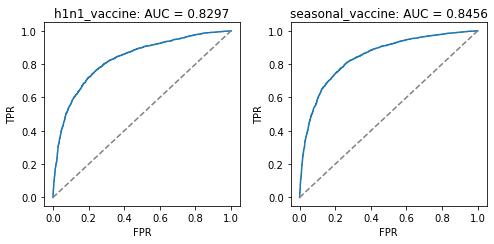

In [61]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

plot_roc(
    y_eval['h1n1_vaccine'], 
    y_preds['h1n1_vaccine'], 
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    y_eval['seasonal_vaccine'], 
    y_preds['seasonal_vaccine'], 
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()

In [62]:
# An AUC score of 0.5 is no better than random, and an AUC score of 1.0 is a perfect model. 
# The competition metric is the average between these two AUC values
roc_auc_score(y_eval, y_preds)

0.8376933157409098

In [63]:
# Retrain Model on Full Dataset
# Now that we have an idea of our performance, 
#we'll want to retrain our model on the full 
#dataset before generating our predictions on the test set

In [64]:
%%time 

full_pipeline.fit(train, train_labels)

CPU times: user 675 ms, sys: 69.1 ms, total: 744 ms
Wall time: 421 ms


Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numeric',
                                                  Pipeline(memory=None,
                                                           steps=[('standard_scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True)),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                 

In [65]:
# GENERATING THE PREDICTIONS FOR THE TEST SET
# Let's make predictions on the test set
# We want the probabilities, not the binary label predictions.

In [66]:
train.shape, test.shape

((26707, 36), (26708, 36))

In [ ]:
test_probas = full_pipeline.predict_proba(test)
test_probas

In [ ]:
submission_df = pd.read_csv("submission_format.csv", 
                            index_col="respondent_id")

In [ ]:
submission_df.head()

In [ ]:
# We want to replace those 0.5s and 0.7s with our predictions
# Make sure we have the rows in the same order
np.testing.assert_array_equal(test.index.values, 
                              submission_df.index.values)

# Save predictions to submission data frame
submission_df["h1n1_vaccine"] = test_probas[0][:, 1]
submission_df["seasonal_vaccine"] = test_probas[1][:, 1]

submission_df.head()

In [ ]:
submission_df.to_csv('my_submission.csv', index=True)

In [ ]:
!head my_submission.csv